In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Carregar os arquivos CSV de treino e teste
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Visualizar as primeiras linhas dos conjuntos de treino e teste para entender os dados
train_head = train_df.head()
test_head = test_df.head()

# Informações gerais sobre os datasets
train_info = train_df.info()
test_info = test_df.info()

(train_head, test_head, train_info, test_info)

# Analisando a porcentagem de valores ausentes em cada coluna do conjunto de treino
missing_values_percentage = train_df.isnull().mean() * 100

# Removendo colunas com mais de 50% de valores ausentes
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index
train_df_cleaned = train_df.drop(columns=columns_to_drop)
test_df_cleaned = test_df.drop(columns=columns_to_drop)

# Preenchendo os valores ausentes nas colunas restantes com a mediana de cada coluna
train_df_cleaned = train_df_cleaned.fillna(train_df_cleaned.median())
test_df_cleaned = test_df_cleaned.fillna(test_df_cleaned.median())

X_train = train_df_cleaned.drop(columns=['y'])
y_train = train_df_cleaned['y']
X_test = test_df_cleaned.drop(columns=['y'])
y_test = test_df_cleaned['y']

# Normalizando os dados (StandardScaler para padronização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152038 entries, 0 to 152037
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      151333 non-null  float64
 1   x1      152037 non-null  float64
 2   x2      152037 non-null  float64
 3   x3      71762 non-null   float64
 4   x4      152037 non-null  float64
 5   x5      152037 non-null  float64
 6   x6      146648 non-null  float64
 7   x7      152037 non-null  float64
 8   x8      149891 non-null  float64
 9   x9      147583 non-null  float64
 10  x10     151937 non-null  float64
 11  x11     71762 non-null   float64
 12  x12     151333 non-null  float64
 13  x13     151937 non-null  float64
 14  x14     152037 non-null  float64
 15  x15     149943 non-null  float64
 16  x16     71762 non-null   float64
 17  x17     152037 non-null  float64
 18  x18     146412 non-null  float64
 19  x19     151333 non-null  float64
 20  x20     151876 non-null  float64
 21  x21     15

In [8]:
# Selecionar 10% dos dados de treino mantendo a proporção das classes na coluna 'y'
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_scaled, y_train, 
    test_size=0.9,  # Retém 10% dos dados
    stratify=y_train,  # Mantém a proporção das classes em 'y_train'
    random_state=42
)

# Exibir o número de amostras em cada conjunto e a distribuição das classes
print("Amostra de treino - Distribuição de classes:")
print(y_train_sample.value_counts(normalize=True))



Amostra de treino - Distribuição de classes:
1    0.856213
0    0.143787
Name: y, dtype: float64



Acurácia do modelo com kernel linear: 0.86

Relatório de classificação para kernel linear:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2186
           1       0.86      1.00      0.92     13017

    accuracy                           0.86     15203
   macro avg       0.43      0.50      0.46     15203
weighted avg       0.73      0.86      0.79     15203


Matriz de confusão para kernel linear:
[[    0  2186]
 [    0 13017]]


c:\Users\Carlos Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

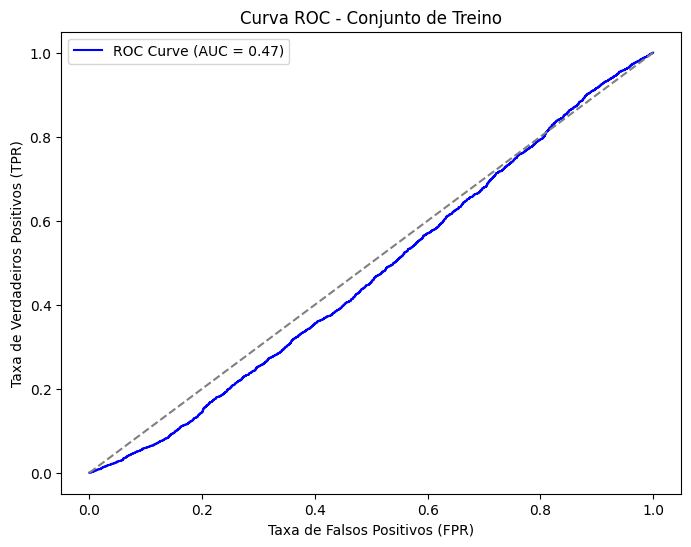

In [9]:
# Treinamento do SVM com kernel linear e cálculo de probabilidades
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_sample, y_train_sample.values.ravel())

# Fazer previsões no conjunto de treino
y_pred_linear = svm_linear.predict(X_train_sample)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_train_sample, y_pred_linear)
print(f"\nAcurácia do modelo com kernel linear: {accuracy:.2f}")

# Avaliar o desempenho do modelo com kernel linear
print("\nRelatório de classificação para kernel linear:")
print(classification_report(y_train_sample, y_pred_linear))

# Matriz de confusão
print("\nMatriz de confusão para kernel linear:")
print(confusion_matrix(y_train_sample, y_pred_linear))

# Calcular e plotar a curva ROC AUC
y_train_proba = svm_linear.predict_proba(X_train_sample)[:, 1]
roc_auc = roc_auc_score(y_train_sample, y_train_proba)
fpr, tpr, thresholds = roc_curve(y_train_sample, y_train_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Conjunto de Treino")
plt.legend()
plt.show()


c:\Users\Carlos Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



Acurácia do modelo no conjunto de teste: 0.78

Relatório de classificação para kernel linear (conjunto de teste):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2388
           1       0.78      1.00      0.88      8358

    accuracy                           0.78     10746
   macro avg       0.39      0.50      0.44     10746
weighted avg       0.60      0.78      0.68     10746


Matriz de confusão para kernel linear (conjunto de teste):
[[   0 2388]
 [   0 8358]]


c:\Users\Carlos Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

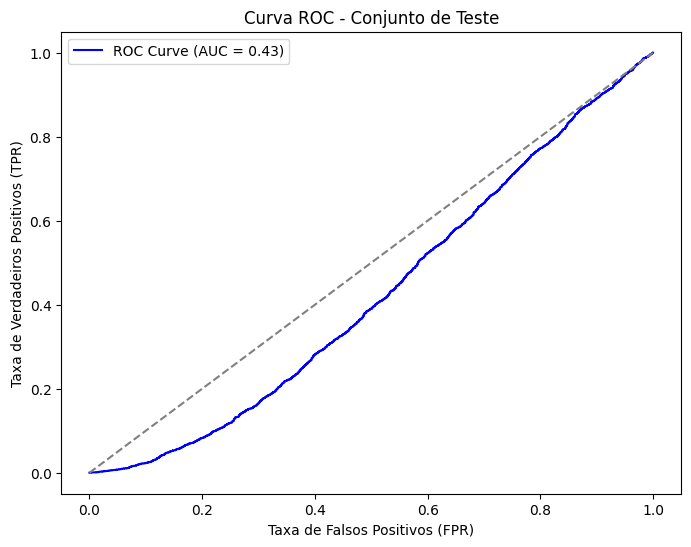

In [6]:
# Fazer previsões no conjunto de teste
y_test_pred_linear = svm_linear.predict(X_test)

# Calcular a acurácia do modelo no conjunto de teste
accuracy = accuracy_score(y_test, y_test_pred_linear)
print(f"\nAcurácia do modelo no conjunto de teste: {accuracy:.2f}")

# Avaliar o desempenho do modelo no conjunto de teste com kernel linear
print("\nRelatório de classificação para kernel linear (conjunto de teste):")
print(classification_report(y_test, y_test_pred_linear))

# Matriz de confusão para o conjunto de teste
print("\nMatriz de confusão para kernel linear (conjunto de teste):")
print(confusion_matrix(y_test, y_test_pred_linear))

# Calcular e plotar a curva ROC AUC
y_test_proba = svm_linear.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Conjunto de Teste")
plt.legend()
plt.show()



In [ ]:
# Aplicar o SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sample, y_train_sample.values.ravel())

# Treinamento do SVM com kernel linear usando os dados balanceados pelo SMOTE
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_smote, y_train_smote)

# Fazer previsões no conjunto de treino
y_pred_linear = svm_linear.predict(X_train_sample)

# Calcular a acurácia no conjunto de treino
accuracy = accuracy_score(y_train_sample, y_pred_linear)
print(f"\nAcurácia do modelo no conjunto de treino com SMOTE: {accuracy:.2f}")

# Avaliar o desempenho do modelo com kernel linear
print("\nRelatório de classificação para kernel linear com SMOTE:")
print(classification_report(y_train_sample, y_pred_linear))

# Matriz de confusão
print("\nMatriz de confusão para kernel linear com SMOTE:")
print(confusion_matrix(y_train_sample, y_pred_linear))

# Calcular e plotar a curva ROC AUC
y_train_proba = svm_linear.predict_proba(X_train_sample)[:, 1]  # Probabilidade da classe positiva
roc_auc = roc_auc_score(y_train_sample, y_train_proba)
fpr, tpr, thresholds = roc_curve(y_train_sample, y_train_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Conjunto de Treino com SMOTE")
plt.legend()
plt.show()


In [ ]:
# Fazer previsões no conjunto de teste após o SMOTE
y_test_pred_linear = svm_linear.predict(X_test)

# Calcular a acurácia no conjunto de teste
accuracy = accuracy_score(y_test, y_test_pred_linear)
print(f"\nAcurácia do modelo no conjunto de teste após SMOTE: {accuracy:.2f}")

# Avaliar o desempenho do modelo no conjunto de teste com kernel linear e ajuste de peso das classes
print("\nRelatório de classificação para kernel linear com ajuste de peso das classes (conjunto de teste):")
print(classification_report(y_test, y_test_pred_linear))

# Matriz de confusão para o conjunto de teste
print("\nMatriz de confusão para kernel linear com ajuste de peso das classes (conjunto de teste):")
print(confusion_matrix(y_test, y_test_pred_linear))

# Calcular e plotar a curva ROC AUC
y_test_proba = svm_linear.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Conjunto de Teste após SMOTE")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Treinamento do SVM com kernel linear, ajuste de peso das classes e cálculo de probabilidades
svm_linear = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_linear.fit(X_train_sample, y_train_sample.values.ravel())

# Fazer previsões no conjunto de treino
y_pred_linear = svm_linear.predict(X_train_sample)

# Calcular a acurácia no conjunto de treino
accuracy = accuracy_score(y_train_sample, y_pred_linear)
print(f"\nAcurácia do modelo no conjunto de treino com ajuste de peso das classes: {accuracy:.2f}")

# Avaliar o desempenho do modelo com kernel linear e ajuste de peso
print("\nRelatório de classificação para kernel linear com ajuste de peso das classes:")
print(classification_report(y_train_sample, y_pred_linear))

# Matriz de confusão
print("\nMatriz de confusão para kernel linear com ajuste de peso das classes:")
print(confusion_matrix(y_train_sample, y_pred_linear))

# Calcular e plotar a curva ROC AUC
y_train_proba = svm_linear.predict_proba(X_train_sample)[:, 1]  # Probabilidade da classe positiva
roc_auc = roc_auc_score(y_train_sample, y_train_proba)
fpr, tpr, thresholds = roc_curve(y_train_sample, y_train_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Conjunto de Treino com Ajuste de Peso das Classes")
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Definir o valor de C e treinar o modelo SVM com probability=True
C_value = 0.1
svm_linear = SVC(kernel='linear', C=C_value, class_weight='balanced', probability=True, random_state=42)
svm_linear.fit(X_train_sample, y_train_sample.values.ravel())

# Fazer previsões no conjunto de teste
y_test_pred_linear = svm_linear.predict(X_test)

# Calcular a acurácia no conjunto de teste
accuracy = accuracy_score(y_test, y_test_pred_linear)
print(f"\nAcurácia do modelo no conjunto de teste: {accuracy:.2f}")

# Avaliar o desempenho do modelo no conjunto de teste com kernel linear e ajuste de peso das classes
print("\nRelatório de classificação para kernel linear com ajuste de peso das classes (conjunto de teste):")
print(classification_report(y_test, y_test_pred_linear))

# Matriz de confusão para o conjunto de teste
print("\nMatriz de confusão para kernel linear com ajuste de peso das classes (conjunto de teste):")
print(confusion_matrix(y_test, y_test_pred_linear))

# Calcular e plotar a curva ROC AUC
y_test_proba = svm_linear.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Conjunto de Teste")
plt.legend()
plt.show()


In [ ]:
# Definir o valor de C
C_value = 0.1 

# Treinamento do SVM com ajuste de peso das classes e o valor de C definido
svm_linear = SVC(kernel='linear', C=C_value, class_weight='balanced', probability=True, random_state=42)
svm_linear.fit(X_train_sample, y_train_sample.values.ravel())

# Fazer previsões no conjunto de treino
y_pred_linear = svm_linear.predict(X_train_sample)

# Calcular a acurácia no conjunto de treino
accuracy = accuracy_score(y_train_sample, y_pred_linear)
print(f"\nAcurácia do modelo no conjunto de treino com C={C_value} e ajuste de peso das classes: {accuracy:.2f}")

# Avaliar o desempenho do modelo com kernel linear e ajuste de peso
print(f"\nRelatório de classificação para kernel linear com C={C_value} e ajuste de peso das classes:")
print(classification_report(y_train_sample, y_pred_linear))

# Matriz de confusão
print(f"\nMatriz de confusão para kernel linear com C={C_value} e ajuste de peso das classes:")
print(confusion_matrix(y_train_sample, y_pred_linear))

# Calcular e plotar a curva ROC AUC
y_train_proba = svm_linear.predict_proba(X_train_sample)[:, 1]  # Probabilidade da classe positiva
roc_auc = roc_auc_score(y_train_sample, y_train_proba)
fpr, tpr, thresholds = roc_curve(y_train_sample, y_train_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - Conjunto de Treino com C={C_value}")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_test_pred_linear = svm_linear.predict(X_test)

# Calcular a acurácia no conjunto de teste
accuracy = accuracy_score(y_test, y_test_pred_linear)
print(f"\nAcurácia do modelo no conjunto de teste com C={C_value} e ajuste de peso das classes: {accuracy:.2f}")

# Avaliar o desempenho do modelo no conjunto de teste com kernel linear, ajuste de peso das classes e C definido
print(f"\nRelatório de classificação para kernel linear com C={C_value} e ajuste de peso das classes (conjunto de teste):")
print(classification_report(y_test, y_test_pred_linear))

# Matriz de confusão para o conjunto de teste
print(f"\nMatriz de confusão para kernel linear com C={C_value} e ajuste de peso das classes (conjunto de teste):")
print(confusion_matrix(y_test, y_test_pred_linear))

# Calcular e plotar a curva ROC AUC
y_test_proba = svm_linear.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - Conjunto de Teste com C={C_value}")
plt.legend()
plt.show()
